In [2]:
%matplotlib widget
import pyslim, msprime, tskit, random, math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG, display

#load tree sequence file, recapitate/mutate if desired
#not recapitating now because that makes tree roots inaccessible individual-wise

ts = pyslim.load("/Users/alexanderwhitwam/Dropbox/university/research/space-trees/alex/habmat.trees")
#ts = ts.recapitate(recombination_rate = 1e-8, Ne=500)
#ts = pyslim.SlimTreeSequence(msprime.mutate(ts, rate=1e-7))

In [3]:
samps = random.sample(sorted(ts.individuals_alive_at(0)), 5)
snodes = []
for i in samps:
    snodes.append(ts.individuals()[i].nodes[0])
    snodes.append(ts.individuals()[i].nodes[1])
sts = ts.simplify(snodes, keep_unary = True, keep_input_roots = True)

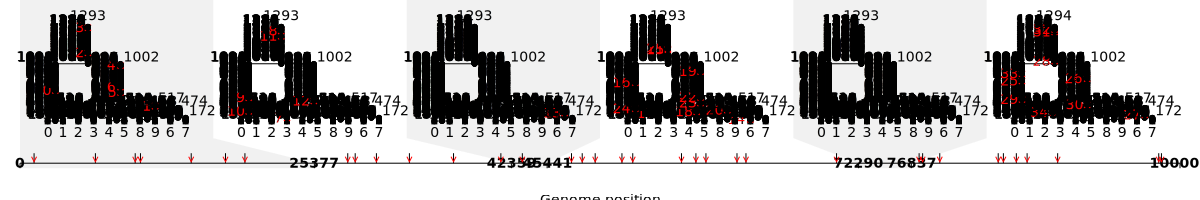

In [5]:
SVG(sts.draw_svg())

In [9]:
simpns = []
for i in range(0, 5):
    for n in sts.individual(i).nodes:
        simpns.append(n)

In [12]:
def ancestral_movement(tree):
    lists, simpis, ancestors, points, mutis = [], [], [], [], [] #lists of xyz coordinates for each individual, 
                                          #descendant & ancestral individuals in simplified ts
    xm, ym, zm = [], [], []
    for mut in tree.mutations():
        ind = sts.node(mut.node).individual
        if ind != -1:
            mutis.append(ind)
            xm.append(sts.individual(ind).location[0])
            ym.append(sts.individual(ind).location[1])
            zm.append(sts.individual(ind).time)

    for n in simpns:
        ind = sts.node(n).individual
        if ind not in simpis:
            simpis.append(ind)
        x = [sts.individual(ind).location[0]]
        y = [sts.individual(ind).location[1]]
        z = [sts.individual(ind).time]
        while tree.parent(n) != tskit.NULL and sts.node(tree.parent(n)).time < 2000:
            n = tree.parent(n)
            indi = sts.node(n).individual
            if indi != -1:
                if tree.num_children(n) > 1 or indi in mutis:
                    x.append(sts.individual(indi).location[0])
                    y.append(sts.individual(indi).location[1])
                    z.append(sts.individual(indi).time)
                    points.append(indi)
                elif tree.num_children(n) == 1:
                    points.append(indi)
                    if sts.individual(indi).time % 10 == 0 or n in tree.roots:
                        x.append(sts.individual(indi).location[0])
                        y.append(sts.individual(indi).location[1])
                        z.append(sts.individual(indi).time)
        lists.append([x, y, z])

    xan, yan, zan = [], [], []
    for n in tree.roots:
        i = sts.node(n).individual
        if i != -1:
            ancestors.append(i)
            xan.append(sts.individual(i).location[0])
            yan.append(sts.individual(i).location[1])
            zan.append(sts.individual(i).time)
                                
    xde, yde, zde = [], [], []
    for i in simpis:
        xde.append(sts.individual(i).location[0])
        yde.append(sts.individual(i).location[1])
        zde.append(sts.individual(i).time)
        
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_zlim([2000, 0])

    for i in range(len(lists)):
        ax.plot(lists[i][0], lists[i][1], lists[i][2], color="black", linewidth=0.5)

    ax.scatter3D(xan, yan, zan, color="xkcd:sky blue")
    ax.scatter3D(xde, yde, zde, color="xkcd:orange")
    ax.scatter3D(xm, ym, zm, color="green")

In [13]:
# Iterate over the trees from left-to-right
tree = tskit.Tree(sts)
while tree.next():
    if tree.num_mutations > 0:
        ancestral_movement(tree)
        print(tree)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

╔═══════════════════════════════════╗
║Tree                               ║
╠═══════════════════╤═══════════════╣
║Index              │              0║
╟───────────────────┼───────────────╢
║Interval           │0-25377 (25377)║
╟───────────────────┼───────────────╢
║Roots              │              1║
╟───────────────────┼───────────────╢
║Nodes              │           1295║
╟───────────────────┼───────────────╢
║Sites              │              7║
╟───────────────────┼───────────────╢
║Mutations          │              7║
╟───────────────────┼───────────────╢
║Total Branch Length│           4474║
╚═══════════════════╧═══════════════╝



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

╔═══════════════════════════════════════╗
║Tree                                   ║
╠═══════════════════╤═══════════════════╣
║Index              │                  1║
╟───────────────────┼───────────────────╢
║Interval           │25377-42359 (16982)║
╟───────────────────┼───────────────────╢
║Roots              │                  1║
╟───────────────────┼───────────────────╢
║Nodes              │               1295║
╟───────────────────┼───────────────────╢
║Sites              │                  6║
╟───────────────────┼───────────────────╢
║Mutations          │                  6║
╟───────────────────┼───────────────────╢
║Total Branch Length│               4474║
╚═══════════════════╧═══════════════════╝



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

╔══════════════════════════════════════╗
║Tree                                  ║
╠═══════════════════╤══════════════════╣
║Index              │                 2║
╟───────────────────┼──────────────────╢
║Interval           │42359-45441 (3082)║
╟───────────────────┼──────────────────╢
║Roots              │                 1║
╟───────────────────┼──────────────────╢
║Nodes              │              1295║
╟───────────────────┼──────────────────╢
║Sites              │                 1║
╟───────────────────┼──────────────────╢
║Mutations          │                 1║
╟───────────────────┼──────────────────╢
║Total Branch Length│              4474║
╚═══════════════════╧══════════════════╝



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

╔═══════════════════════════════════════╗
║Tree                                   ║
╠═══════════════════╤═══════════════════╣
║Index              │                  3║
╟───────────────────┼───────────────────╢
║Interval           │45441-72290 (26849)║
╟───────────────────┼───────────────────╢
║Roots              │                  1║
╟───────────────────┼───────────────────╢
║Nodes              │               1295║
╟───────────────────┼───────────────────╢
║Sites              │                 11║
╟───────────────────┼───────────────────╢
║Mutations          │                 11║
╟───────────────────┼───────────────────╢
║Total Branch Length│               4474║
╚═══════════════════╧═══════════════════╝



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

╔════════════════════════════════════════╗
║Tree                                    ║
╠═══════════════════╤════════════════════╣
║Index              │                   5║
╟───────────────────┼────────────────────╢
║Interval           │76837-100000 (23163)║
╟───────────────────┼────────────────────╢
║Roots              │                   1║
╟───────────────────┼────────────────────╢
║Nodes              │                1295║
╟───────────────────┼────────────────────╢
║Sites              │                  10║
╟───────────────────┼────────────────────╢
║Mutations          │                  10║
╟───────────────────┼────────────────────╢
║Total Branch Length│                4474║
╚═══════════════════╧════════════════════╝



In [29]:
def spreading(tree):
    x, y, mx, my, simpis = [], [], [], [], []
    mis = {}
    for i in range(sts.num_nodes):
        mis[i] = 0
    for var in sts.variants(samples=range(sts.num_nodes), isolated_as_missing=False):
        for i in range(sts.num_nodes):
            if var.genotypes[i] == 1:
                mis[i] += 1
    dic = {}
    for n in simpns:
        if sts.node(n).individual not in simpis:
            simpis.append(sts.node(n).individual)
        while tree.parent(n) != tskit.NULL and sts.node(tree.parent(n)).individual != -1:
            ind = sts.node(n).individual
            t = sts.individual(ind).time
            ix = sts.individual(ind).location[0]
            iy = sts.individual(ind).location[1]
            p = sts.node(tree.parent(n)).individual
            px = sts.individual(p).location[0]
            py = sts.individual(p).location[1]
            diff = math.sqrt((px-ix)**2 + (py-iy)**2)
            if mis[p] > 0:
                t = t + 13000
            if t not in dic.keys():
                dic[t] = diff
            else:
                dic[t] += diff
            n = tree.parent(n)
    keylist = list(dic.keys())
    for key in keylist:
        if key < 13000:
            x.append(key)
            y.append(dic[key])
        else:
            mx.append(key - 13000)
            my.append(dic[key])
    fig = plt.figure()
    m, b = np.polyfit(x, y, 1)
    bestfit = [m*val+b for val in x]
    plt.plot(x, bestfit, color="blue", linewidth=2.0, linestyle="dashed")
    plt.scatter(x, y, color="lightblue", s=5.0)  
    if tree.num_mutations > 0:
        mix, bix = np.polyfit(mx, my, 1)
        bestfitm = [mix*val+bix for val in mx]
        plt.plot(mx, bestfitm, color="green", linewidth=2.0, linestyle="dashed")    
        plt.scatter(mx, my, color="lightgreen", s=25.0)

In [30]:
for t in sts.trees():
    if t.num_mutations > 0:
        spreading(t)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

TypeError: expected non-empty vector for x